In [1]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime

In [2]:
# load county data
counties = pd.read_csv('us-counties.csv')
counties.sample(5)

,date,county,state,fips,cases,deaths
291482,7/1/2020,Alger,Michigan,26003.0,4,0
60276,4/15/2020,Alpena,Michigan,26007.0,1,0
129671,5/9/2020,Aransas,Texas,48007.0,2,0
224660,6/10/2020,Marengo,Alabama,1091.0,193,7
587955,10/1/2020,Roosevelt,Montana,30085.0,407,4


In [3]:
states = pd.read_csv('us.csv')
states.sample(5)

,date,cases,deaths
238,9/15/2020,6614317,195689
27,2/17/2020,25,0
115,5/15/2020,1451093,87499
54,3/15/2020,3600,68
286,11/2/2020,9376821,231477


In [30]:
# find hennepin county
henn = counties[(counties['county']=='Hennepin') & (counties['state']=='Minnesota')]
henn.sample(3)

,date,county,state,fips,cases,deaths
678473,10/29/2020,Hennepin,Minnesota,27053.0,35484,995
8816,3/23/2020,Hennepin,Minnesota,27053.0,89,0
210466,6/5/2020,Hennepin,Minnesota,27053.0,9099,657


In [31]:
henn['datetime'] = pd.to_datetime(henn['date'])


In [32]:
henn.sort_values(by = 'datetime')
henn = henn.reset_index()
henn = henn.groupby(["datetime"]).sum()

# Sort by datetime and reset index
henn.sort_values(by = 'datetime')
henn = henn.reset_index()

# Finish datetime conversion
henn['datetime'] = pd.to_datetime(henn['datetime'])
henn['day'] = henn['datetime'].map(lambda x: x.day)
henn['month'] = henn['datetime'].map(lambda x: x.month)
henn['year'] = henn['datetime'].map(lambda x: x.year)

henn = henn.dropna()
henn = henn
henn.tail(1)

,datetime,index,fips,cases,deaths,day,month,year
245,2020-11-12,723888,27053.0,46555,1033,12,11,2020


In [ ]:


    
henn['new_deaths'] = henn['new_deaths'].fillna(0)

In [34]:
henn['new_deaths'] = henn['deaths'].diff()

henn.tail()

,datetime,index,fips,cases,deaths,day,month,year,new_deaths
241,2020-11-08,710912,27053.0,42695,1023,8,11,2020,3.0
242,2020-11-09,714156,27053.0,43570,1023,9,11,2020,0.0
243,2020-11-10,717400,27053.0,44547,1025,10,11,2020,2.0
244,2020-11-11,720644,27053.0,45372,1030,11,11,2020,5.0
245,2020-11-12,723888,27053.0,46555,1033,12,11,2020,3.0


In [35]:
henn['new_deaths'] = henn['new_deaths'].fillna(0)
henn

,datetime,index,fips,cases,deaths,day,month,year,new_deaths
0,2020-03-12,1487,27053.0,1,0,12,3,2020,0.0
1,2020-03-13,1770,27053.0,3,0,13,3,2020,0.0
2,2020-03-14,2114,27053.0,6,0,14,3,2020,0.0
3,2020-03-15,2518,27053.0,12,0,15,3,2020,0.0
4,2020-03-16,2970,27053.0,26,0,16,3,2020,0.0
...,...,...,...,...,...,...,...,...,...
241,2020-11-08,710912,27053.0,42695,1023,8,11,2020,3.0
242,2020-11-09,714156,27053.0,43570,1023,9,11,2020,0.0
243,2020-11-10,717400,27053.0,44547,1025,10,11,2020,2.0
244,2020-11-11,720644,27053.0,45372,1030,11,11,2020,5.0


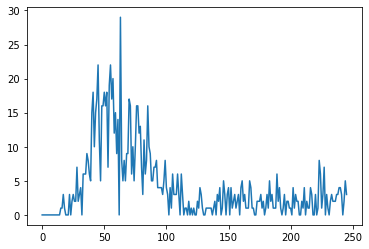

In [36]:
# plot new deaths
henn['new_deaths'].plot()

In [11]:
henn['adjust'] = henn['deaths'] * .8
henn

,datetime,index,fips,cases,deaths,day,month,year,new_deaths,adjust
0,2020-03-06,619,27123.0,1,0,6,3,2020,0.0,0.0
1,2020-03-07,705,27123.0,1,0,7,3,2020,0.0,0.0
2,2020-03-08,1617,54142.0,2,0,8,3,2020,0.0,0.0
3,2020-03-09,1865,54142.0,2,0,9,3,2020,0.0,0.0
4,2020-03-10,3246,81145.0,3,0,10,3,2020,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
247,2020-11-08,62561796,2356569.0,180916,2710,8,11,2020,31.0,2168.0
248,2020-11-09,62847268,2356569.0,184842,2729,9,11,2020,19.0,2183.2
249,2020-11-10,63132740,2356569.0,189735,2752,10,11,2020,23.0,2201.6
250,2020-11-11,63418212,2356569.0,194626,2810,11,11,2020,58.0,2248.0


In [37]:
def make_models():
    ''' function to run deaths model'''
    # Make the model
    Hen_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = henn[["day", "month", "year"]]
    y_Us = henn[["deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    Hen_model.fit(X_train_Us, y_train_Us)
    Hen_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [20, 27, 4, 11, 18, 25], "month": [11, 11, 12, 12, 12, 12], "year": [2020, 2020, 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    # Predict with the model
    predictions = Hen_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_deaths"] = predictions
    predict_weeks["predicted_deaths"] = predict_weeks['predicted_deaths'].astype('float')
    
    return predict_weeks

make_models()

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,1240.821170
1,27,11,2020,2020-11-27,1275.771461
2,4,12,2020,2020-12-04,1299.694844
3,11,12,2020,2020-12-11,1334.645135
4,18,12,2020,2020-12-18,1369.595426
5,25,12,2020,2020-12-25,1404.545716


In [38]:
mn = make_models()
mn

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,1240.821170
1,27,11,2020,2020-11-27,1275.771461
2,4,12,2020,2020-12-04,1299.694844
3,11,12,2020,2020-12-11,1334.645135
4,18,12,2020,2020-12-18,1369.595426
5,25,12,2020,2020-12-25,1404.545716


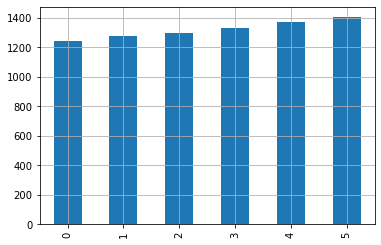

In [40]:
mn['predicted_deaths'].plot.bar()
plt.grid(True)

In [39]:
mn['adjust'] = mn['predicted_deaths'] * .8
mn

,day,month,year,datetime,predicted_deaths,adjust
0,20,11,2020,2020-11-20,1240.821170,992.656936
1,27,11,2020,2020-11-27,1275.771461,1020.617169
2,4,12,2020,2020-12-04,1299.694844,1039.755875
3,11,12,2020,2020-12-11,1334.645135,1067.716108
4,18,12,2020,2020-12-18,1369.595426,1095.676340
5,25,12,2020,2020-12-25,1404.545716,1123.636573


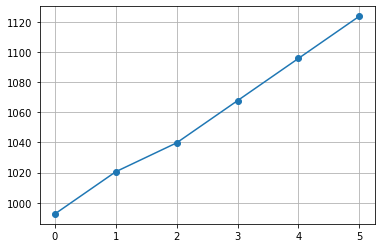

In [41]:
mn['adjust'].plot(marker='o')
plt.grid(True)

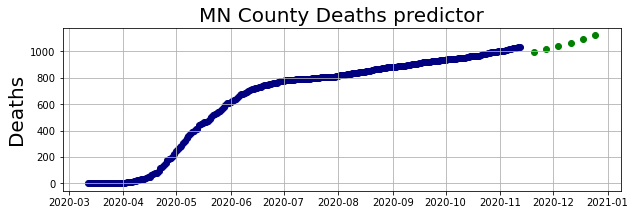

In [44]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (10, 3))
plt.scatter(mn['datetime'],mn['adjust'],c='g',)
plt.scatter(henn['datetime'],henn['deaths'],c='#000080',)
plt.grid(True)
plt.title('MN County Deaths predictor', fontsize = 20)
plt.ylabel('Deaths', fontsize = 20)
plt.show()